# Notebook activity 5.7 Trying other explanatory variables in a simple linear regression model

In Notebook activity 5.6, using data from the Olympics dataset, we fitted a simple linear regression model for the response: 

* `medals`: the number of medals won by a nation at a summer Olympics, as it stood on 9 August 2021 (the day after the end of Tokyo 2020). 

using the number of medals won at the previous Olympics (`lagMedals`) as the explanatory variable. 

In this notebook activity, we will fit two more simple linear regression models for `medals`. This time each model will use one of the following covariates as the explanatory variable.

* `population`: total population size (in millions) of a nation in the year of the previous Olympics
* `gdp`: a nation’s GDP per capita (in thousands), relative to the US dollar in 2010, in the year of the previous Olympics.

The data are stored in the `olympic` data frame. 

## (a) Getting started

### (i)

Start by running the following code.

In [ ]:
# Load the M348 package
library(M348)
# Load the olympic data frame
data(olympic)
# Check the data frame has loaded OK
head(olympic)

## (b) Exploring the data

We would like to fit two separate simple linear regression models for the response `medals`: one model using `population` as the explanatory variable; the other model using `gdp` as the explanatory variable.

### (i)

Use the empty code cell below to produce a scatterplot of `medals` against `population`, and a second scatterplot of `medals` against `gdp`. 

#### Solution <a class="tocSkip">

The required code and resulting scatterplots are given below.

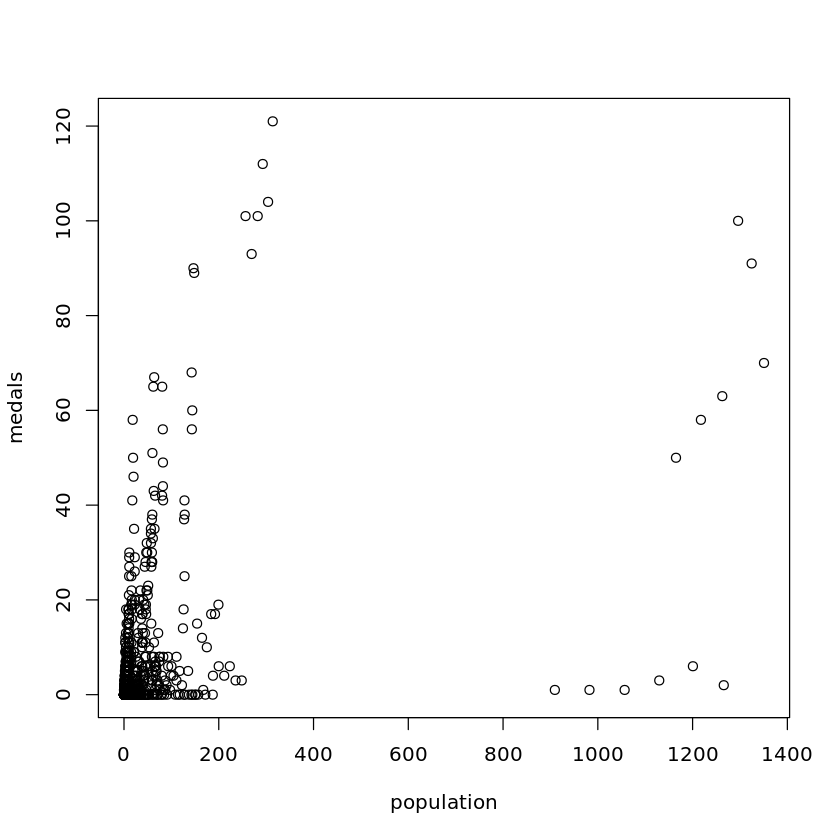

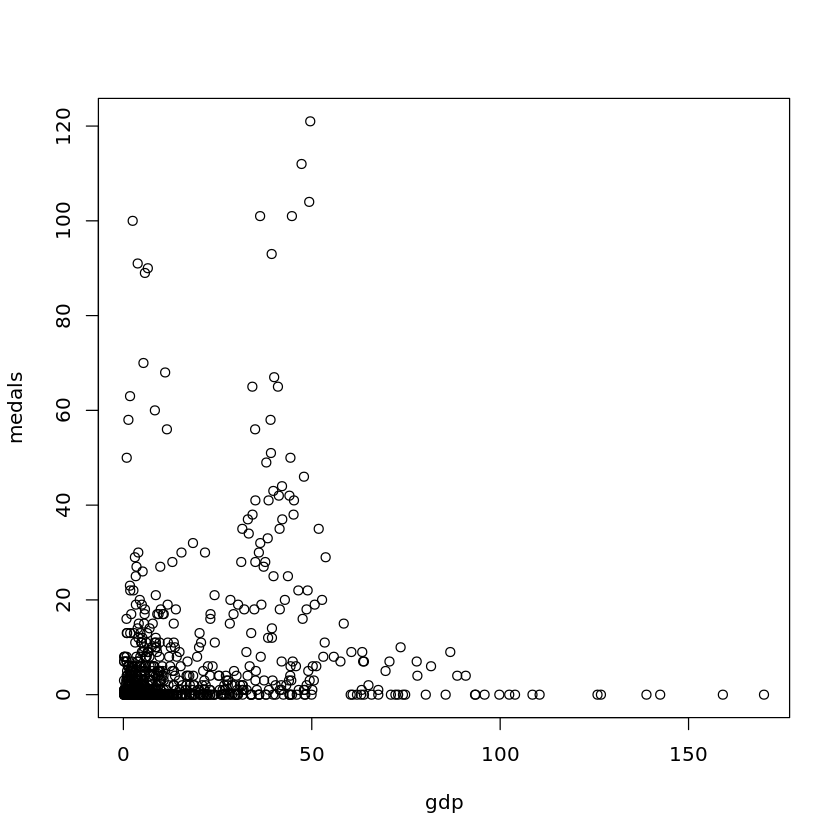

In [2]:
plot(medals ~ population, data = olympic)
plot(medals ~ gdp, data = olympic)

### (ii)

From the plots you obtained in part (i), does it look as if using a simple linear regression model for `medals` with  `population` as the explanatory variable will be suitable? Why or why not?  Similarly, does it look as if using a simple linear regression model for `medals` with `gdp` as the explanatory variable will be suitable? Why or why not?

#### Solution <a class="tocSkip">

A simple linear regression model doesn't look as if is will be suitable in either case. 

There doesn't seem to be a linear relationship between the response and either of the explanatory variables. There are observations where a high value of `population` or a high value of `gdp` is asssociated with more medals, and other observations where a modest value of `population` or a modest value of `gdp` is associated with a large number of medals. 

---

###  <a class="tocSkip">

From the scatterplots of the response `medals` against each of the potential explanatory variables `population` and `gdp`, it looks like there aren't linear relationships between either of the potential explanatory variables and the response. 

Since the main issue from the scatterplots is that the linearity assumption does not hold (see Box 16, Unit 2, Subsection 4.1) we can try transforming the explanatory variables to see if that helps improve linearity.

## (c) Transforming the explanatory variables

We will try using the log transformation for each of the two explanatory variables. For an explanation as to why we are choosing the log transformation, let us look at histograms of the explanatory variables.

### (i)

Use the empty code cell below to produce separate histograms of `population` and `gdp`. 

#### Solution <a class="tocSkip">

The required code and resulting histograms are shown below.

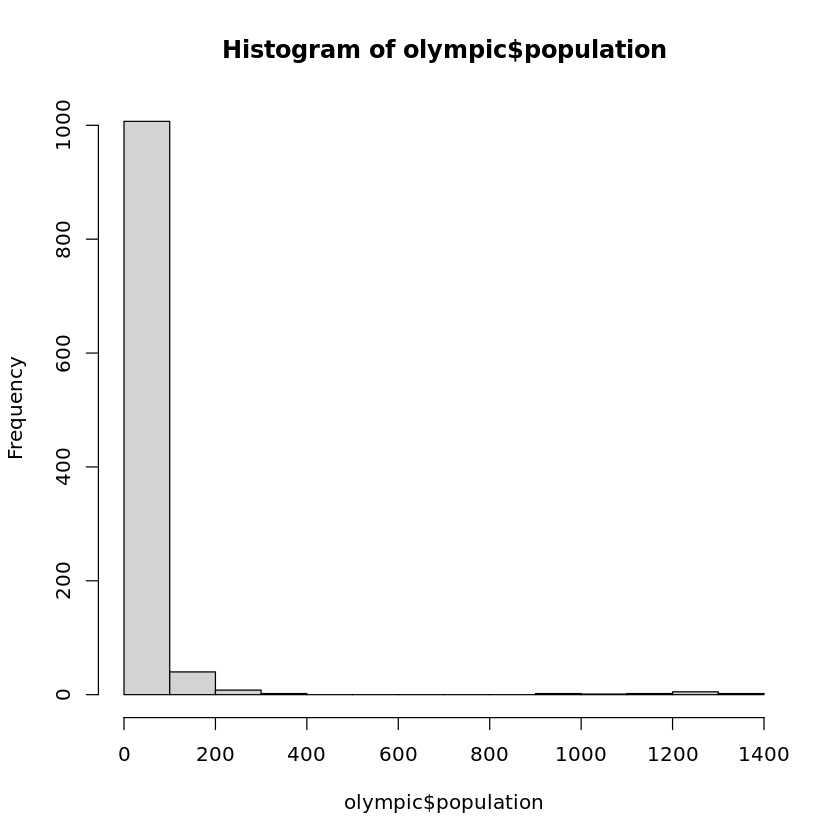

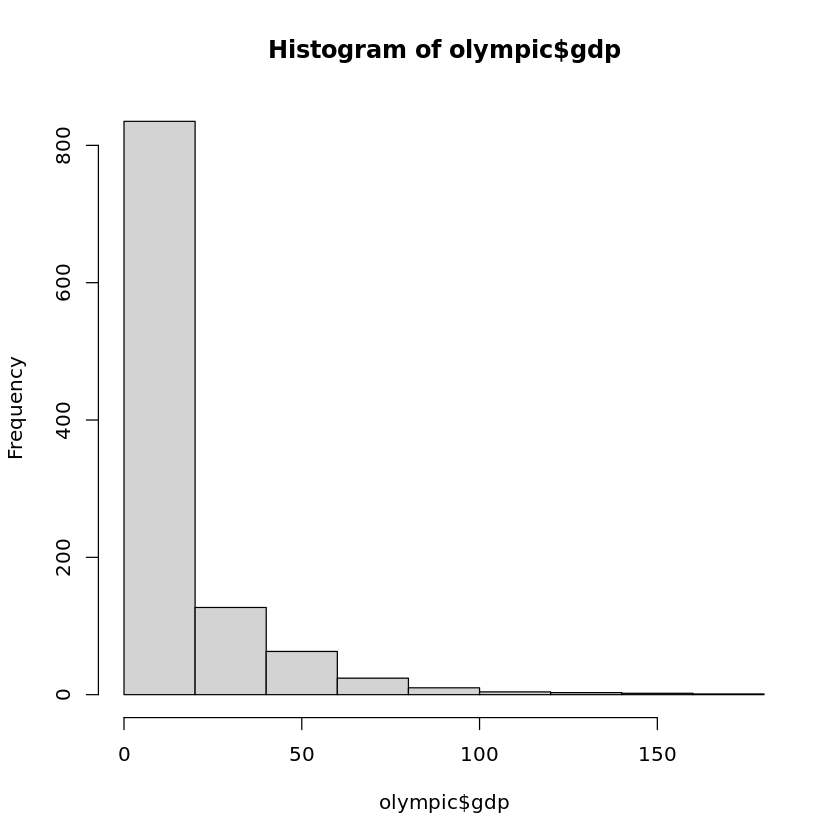

In [3]:
hist(olympic$population)
hist(olympic$gdp)

### (ii)

From the histograms you produced in part (i) and your knowledge of the ladder of powers (Box 17, Unit 2, Subsection 4.2), explain why the log transformation may be a sensible transformation to try for each of `population` and `gdp`. 

#### Solution <a class="tocSkip">

Both histograms have very long right tails, and are therefore right-skew. Because the distributions are right-skew, it is sensible to try going *down* the ladder of powers: the log transformation is indeed down the ladder of powers.

---

###  <a class="tocSkip">

We will now use the log transformation on each of the explanatory variables.

### (iii)

Use the empty code cell below to define two new variables:

* `logPopulation` which is defined as `log(population)`, and
* `logGdp` which is defined as `log(gdp)`.

Produce scatterplots of the response (`medals`) and each of these new variables. 

(Hint: Applying the transformations was introduced in Notebook activity 2.5.)

#### Solution <a class="tocSkip">

The required code and resulting output are given below.

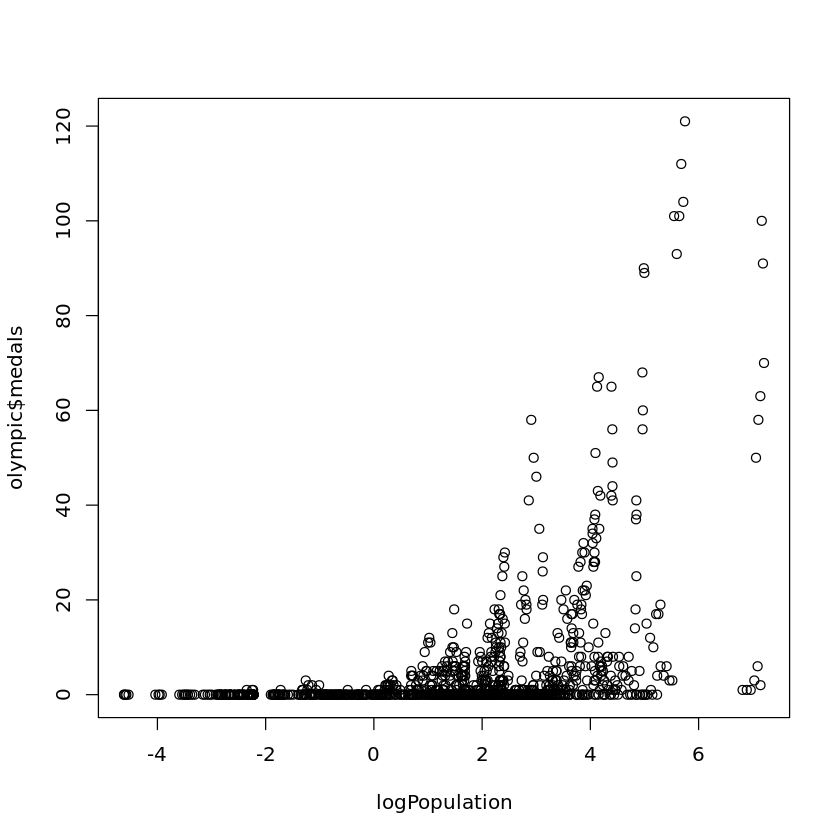

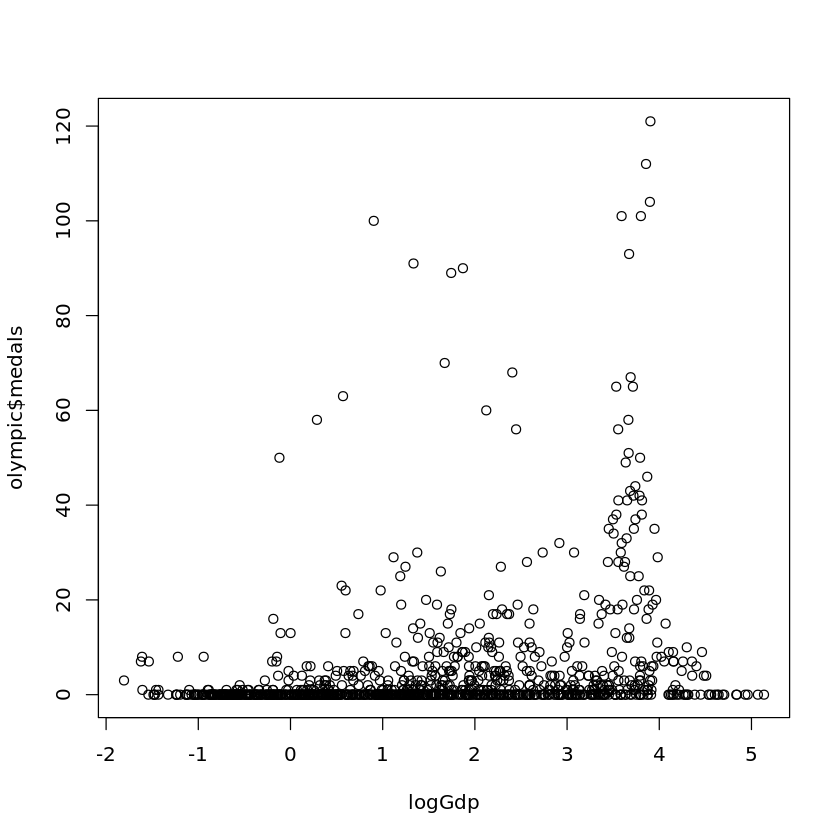

In [4]:
logPopulation <- log(olympic$population)
logGdp <- log(olympic$gdp)
# note here logPopulation and logGdp have not been added to olympic
plot(olympic$medals ~ logPopulation)
plot(olympic$medals ~ logGdp)

### (iv)

Based on the scatterplots you produced in part (iii), does simple linear regression using either of these transformed explanatory variables look reasonable?

#### Solution <a class="tocSkip">

Both plots make it easier to see what the relationship might be the number of medals won and population or GDP for countries with smaller populations and for countries that are relatively poor. Unfortunately, all this does is make it clearer that simple linear regression does not appear suitable in either case. There seems little suggestion of a linear relationship and, if there is one, the assumption of constant variance seems unreasonable.

###  <a class="tocSkip">

The table below gives the adjusted $R^2$ and AIC for the simple linear regression models for `medals` that we have been considering so far in this notebook activity, and also in Notebook activity 5.6.

 Model | Adjusted $R^2$ | AIC
 --- | --- | ---
 `medals ~ lagMedals` | 93.95% | 2560
 `medals ~ population` | 18.27% | 5343
 `medals ~ gdp` | 3.97% | 5516
 `medals ~ logPopulation` | 16.38% | 5368 
 `medals ~ logGdp` | 7.38% | 5477

### (v)

Why does this table support the idea what the simple regression model for `medals` using `lagMedals` as the explanatory variable is a far better model than the simple linear regression models for `medals` that use `population`, `gdp`, `logPopulation` or `logGdp`?
 
 

#### Solution <a class="tocSkip">

The adjusted $R^2$ is far bigger for `medals ~ lagMedals` than for the other models, indicating that this model accounts for far more of the percentage of variance than is manged by the other models.

The value of AIC is much lower for `medals ~ lagMedals` than for the other models indicating that its loses far less information and hence is better.

## (d) Transforming the response

As has already been noted, the distribution of the number of medals is very right-skew. This makes it difficult to see any relationships for countries that did not win many (or indeed any) medals. 

You dealt with the fact that the distributions of both `population` and `gdp` are right-skew by applying the log transformation. So, in theory, we could also try taking a log transformation for `medals`. However, there is a problem with using the log transformation in this case.

### (i)

Why is applying the log transformation to `medals`, the number of medals won, a problem?

#### Solution <a class="tocSkip">

Unfortunately, many countries did not win any Olympic medals which means that `medals` is often 0. However, it is not possible to calculate the value $\log(0)$. 

---

###  <a class="tocSkip">

As you saw in Notebook activity 2.5, one way round the problem with using the log transformation for `medals`, is to add a small number to all observations before calculating the log. That is, for a value x of `medals`, calculate $\log(x+\delta)$ for some small value of $\delta$. 

### (ii)

Use the empty code cell below to calculate a new variable

* `logMedalsPlus` which is defined at `log(medals + 0.1)`.

(Note that the code won't produce any output.)

#### Solution <a class="tocSkip">

The required code is as follows.

In [5]:
logMedalsPlus <- log(olympic$medals + 0.1)

### (iii)

Use the empty code cell below to plot `logPopulation` and `logGdp` against `logMedalsPlus`. 

#### Solution <a class="tocSkip">

The required code and resulting scatterplots are given below.

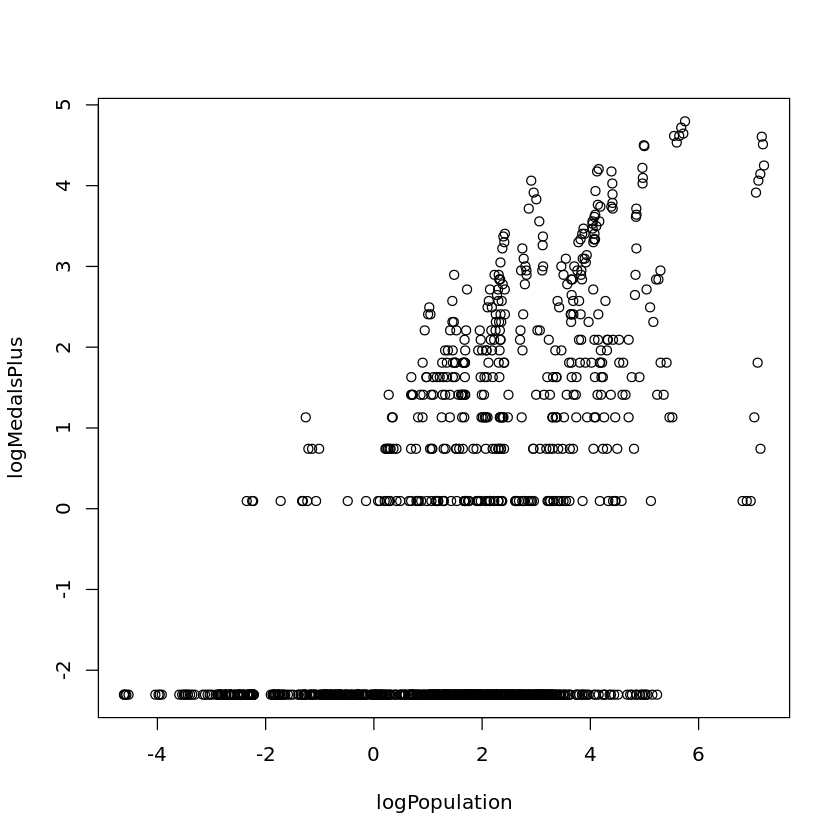

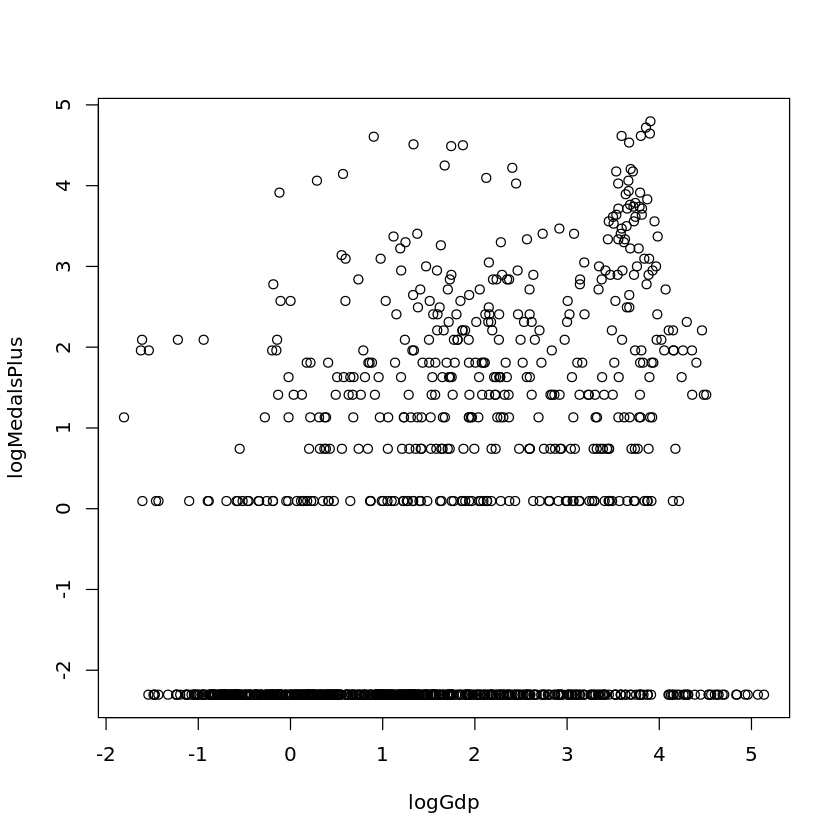

In [6]:
plot(logMedalsPlus ~ logPopulation)
plot(logMedalsPlus ~ logGdp)

### (iv)

Based on the scatterplots you produced in part (iii),  do simple linear regression models using this transformed response variable look reasonable for either of the potential explanatory variables `logPopulation` and `logGdp`?

#### Solution <a class="tocSkip">

In these scatterplots, there are hints of positive relationships between the (transformed) response variable and the two (transformed) explanatory variables. However, it is difficult to see if the countries that did not win any medals follow the same pattern.

## (e) An alternative transformation for the response

An alternative way of dealing with the problem of applying the log transformation to `medals` is to restrict the data so that we only consider modelling those observations relating to countries that won at least one medal. 

One way of doing this in R (though possibly not the most elegant) is to simply calculate `log(medals)`. Any scatterplots involving `log(medals)` will then not include any observations for which the value for `medals` corresponds to $\log(0)$. 

### (i)

Use the empty code cell below to create the new variable:

* `logMedals` which is defined as `log(medals)`,

and obtain the corresponding scatterplots of `logMedals` against `logPopulation`, and `logMedals` against `logGdp`. 

#### Solution <a class="tocSkip">

The required code and resulting scatterplots are given below.

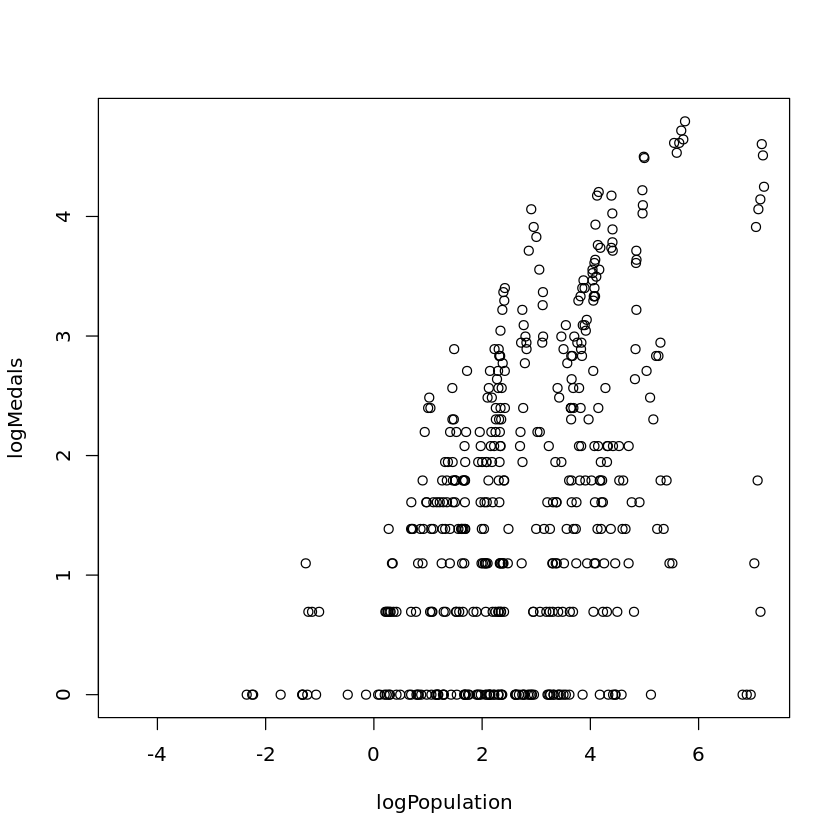

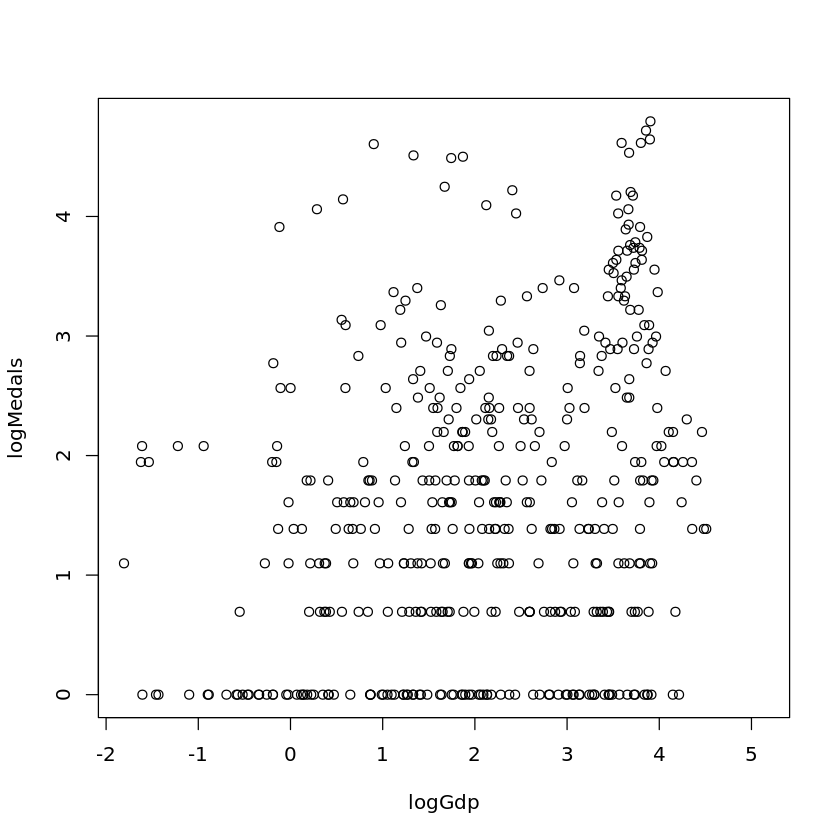

In [7]:
logMedals <- log(olympic$medals)
plot(logMedals ~ logPopulation)
plot(logMedals ~ logGdp)

### (ii)

Based on the scatterplots you produced in part (i), do simple linear regression models for `logMedals` now look reasonable for either of the explanatory variables `logPopulation` and `logGdp`?

#### Solution <a class="tocSkip">

Again there are hints of positive relationships between the response and each of the explanatory variables. However, the assumption of constant variance looks dubious in both cases. So, a simple linear regression involving either of these two explanatory variables does not appear reasonable. 

---

###  <a class="tocSkip">

In part (c) we compared a variety of simple linear regression models for `medals` using adjusted $R^2$ and AIC. 

We could do the same to compare simple linear regression models for `logMedals` and to compare simple linear regression models for `logMedalsPlus` (but won't). 

However, there are problems with using both adjusted $R^2$ and AIC to compare models where the response variable for one of them `logMedals` and the response variable for the other is `logMedalsPlus`.  In particular, for reasons beyond the scope of M348, values of AIC are **not comparable** when the response variable differs - not that it matters in this case as none of the models we have tried in parts (d) and (e) appear to be good models.

As you have probably gathered by now, the simple linear regression model does not always appear to be a good model. Nor is it guaranteed that a transformation can be found to make the simple linear regression model a good model. Sadly this appears to be the case for modelling `medals` based on either just `population` or just `gdp`. So we will stop here. 